In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 
import PIL
import glob



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
category = ["PNEUMONIA", "NORMAL"]

In [3]:
dataset= ["train", "test","val"]

In [4]:
image_count = len(list(glob.glob('./chest_xray/*/*/*.jpeg')))

In [5]:
image_count

5856

In [6]:
len(pneu)

NameError: name 'pneu' is not defined

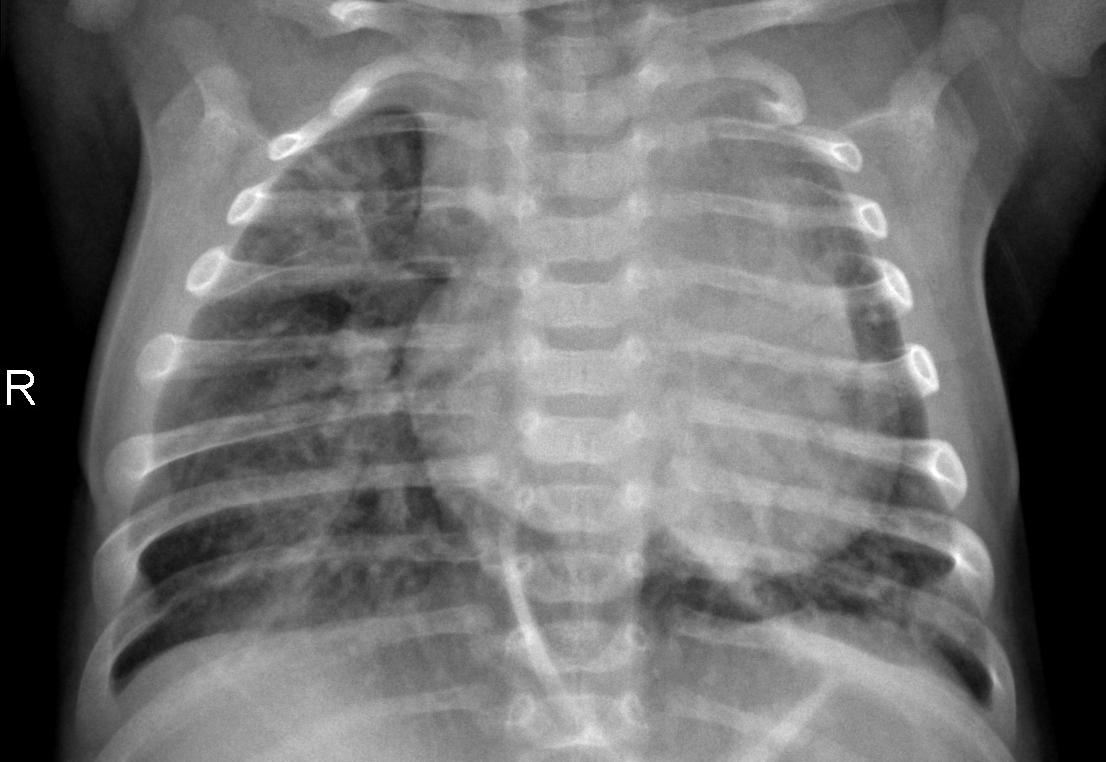

In [7]:
for cat in category:
    if cat == "PNEUMONIA":
        pneu = list(glob.glob('./chest_xray/*/'+ cat + '/*'))
PIL.Image.open(pneu[0])
        


In [8]:
dataset[2]

'val'

In [9]:
list(glob.glob('./chest_xray/'+ dataset[0] + '/*/*'))

['./chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0135-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0137-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0140-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0141-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0143-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0145-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0147-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0149-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0151-0001.jpeg',
 './chest_xray/train\\NORMAL\\IM-0152-0001.jpeg',


In [10]:
for cat in category:
    if cat == "PNEUMONIA":
        pneumonia = list(glob.glob('./chest_xray/*/'+ cat + '/*'))
    else:
        normal = list(glob.glob('./chest_xray/*/'+ cat + '/*'))

In [11]:
normal

['./chest_xray\\test\\NORMAL\\IM-0001-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0003-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0005-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0006-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0007-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0009-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0010-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0011-0001-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0011-0001-0002.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0011-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0013-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0015-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0016-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0017-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0019-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0021-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0022-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0023-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0025-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0027-00

In [12]:
Ray_images_dict = {
    'PNEUMONIA' : pneumonia,
    'NORMAL' : normal,
}

In [13]:
Ray_label_dict = {
    'PNEUMONIA' : 0,
    'NORMAL' : 1
}

In [14]:
Ray_images_dict['PNEUMONIA'][-1]

'./chest_xray\\val\\PNEUMONIA\\person1954_bacteria_4886.jpeg'

In [15]:
len(Ray_images_dict['PNEUMONIA'])

4273

In [16]:
len(Ray_images_dict['NORMAL'])

1583

In [17]:
%%time

widths = []
heights = []

for set_ in dataset:
    for cat in category:
        filelist = glob.glob('./chest_xray/' + set_ + '/' + cat + '/*.jpeg')
        widths.extend([PIL.Image.open(fname).size[0] for fname in filelist])
        heights.extend([PIL.Image.open(fname).size[1] for fname in filelist])

images_size = pd.DataFrame({"widths": widths, "heights": heights})
        
print("Average image width: " + f'{images_size["widths"].mean():.2f}')
print("Average image height: " + f'{images_size["heights"].mean():.2f}')

Average image width: 1327.88
Average image height: 970.69
CPU times: total: 16.6 s
Wall time: 3min 43s


In [18]:
images_size.head(6)

,widths,heights
0,1152,760
1,1072,768
2,1244,863
3,1242,940
4,1488,1280
5,1008,616


In [19]:
# And now we divide the mean width and mean height of the images by 10:

im_width = int(images_size["widths"].mean()/10)
im_height = int(images_size["heights"].mean()/10)
print("image width: " + str(im_width))
print("image height: " + str(im_height))

image width: 132
image height: 97


In [21]:
x, y = [], []
for cat, images in Ray_images_dict.items():
     for image in images:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img, (im_width,im_height))
            x.append(resized_img)
            y.append(Ray_label_dict[cat])

In [60]:
x[:5]

[array([[[20, 20, 20],
         [18, 18, 18],
         [32, 32, 32],
         ...,
         [95, 95, 95],
         [86, 86, 86],
         [88, 88, 88]],
 
        [[18, 18, 18],
         [18, 18, 18],
         [29, 29, 29],
         ...,
         [97, 97, 97],
         [88, 88, 88],
         [77, 77, 77]],
 
        [[16, 16, 16],
         [18, 18, 18],
         [28, 28, 28],
         ...,
         [89, 89, 89],
         [83, 83, 83],
         [79, 79, 79]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8),
 array([[[ 65,  65,  65],
         [ 63,  

In [61]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [62]:
x = np.array(x)
y = np.array(y)

In [63]:
y[:5]

array([0, 0, 0, 0, 0])

In [64]:
x[:2]

array([[[[ 20,  20,  20],
         [ 18,  18,  18],
         [ 32,  32,  32],
         ...,
         [ 95,  95,  95],
         [ 86,  86,  86],
         [ 88,  88,  88]],

        [[ 18,  18,  18],
         [ 18,  18,  18],
         [ 29,  29,  29],
         ...,
         [ 97,  97,  97],
         [ 88,  88,  88],
         [ 77,  77,  77]],

        [[ 16,  16,  16],
         [ 18,  18,  18],
         [ 28,  28,  28],
         ...,
         [ 89,  89,  89],
         [ 83,  83,  83],
         [ 79,  79,  79]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [66]:
xscaled = x / 255

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscaled , y,test_size=0.2,random_state=5)

In [70]:
len(X_train)

4684

In [73]:
len(y_train[y_train==0])

3425

In [74]:
4684-3425

1259

In [75]:
x_train =X_train[:2000]

In [79]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape =  (im_height,
                                                                im_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
])

In [84]:
model = keras.Sequential([
        data_augmentation,
        layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
        layers.MaxPooling2D(),
    
        layers.Conv2D(32, 3,  padding = 'same', activation = 'relu'),
        layers.MaxPooling2D(),
        
        layers.Conv2D(64, 3,  padding = 'same', activation = 'relu'),
        layers.MaxPooling2D(),
    
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2)    
    ])

model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
147/147 [==============================] - 117s 500ms/step - loss: 11.0870 - accuracy: 0.7304
Epoch 2/20
147/147 [==============================] - 75s 506ms/step - loss: 11.1504 - accuracy: 0.7312
Epoch 3/20
147/147 [==============================] - 74s 504ms/step - loss: 11.1504 - accuracy: 0.7312
Epoch 4/20
147/147 [==============================] - 76s 514ms/step - loss: 11.1504 - accuracy: 0.7312
Epoch 5/20
147/147 [==============================] - 73s 500ms/step - loss: 11.1504 - accuracy: 0.7312
Epoch 6/20
147/147 [==============================] - 74s 502ms/step - loss: 11.1504 - accuracy: 0.7312
Epoch 7/20
147/147 [==============================] - 74s 505ms/step - loss: 11.1504 - accuracy: 0.7312
Epoch 8/20
147/147 [==============================] - 74s 504ms/step - loss: 11.1504 - accuracy: 0.7312
Epoch 9/20
147/147 [==============================] - 75s 510ms/step - loss: 11.1504 - accuracy: 0.7312
Epoch 10/20
147/147 [==============================] - 75s 510m

In [85]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 22s 188ms/step - loss: 11.0336 - accuracy: 0.7235


[11.033578872680664, 0.723549485206604]